In [4]:
from density import EQ_Density
from clustering import dbscan

<b> Initiate density class</b>

Proposed Radius: 0.092
Done!
File saved as: den_cat_65.csv
Density Matrix Shape:
 (65, 65)


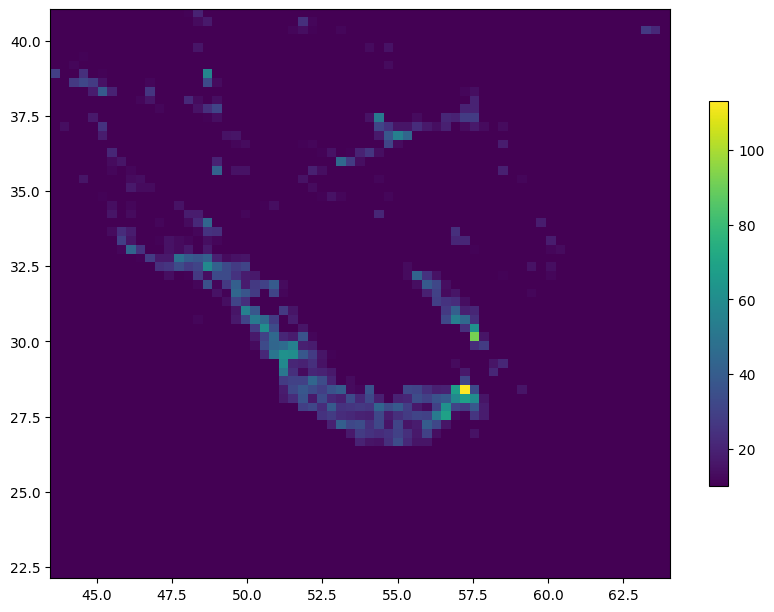

Smooth Density Matrix Shape:
 (65, 65)


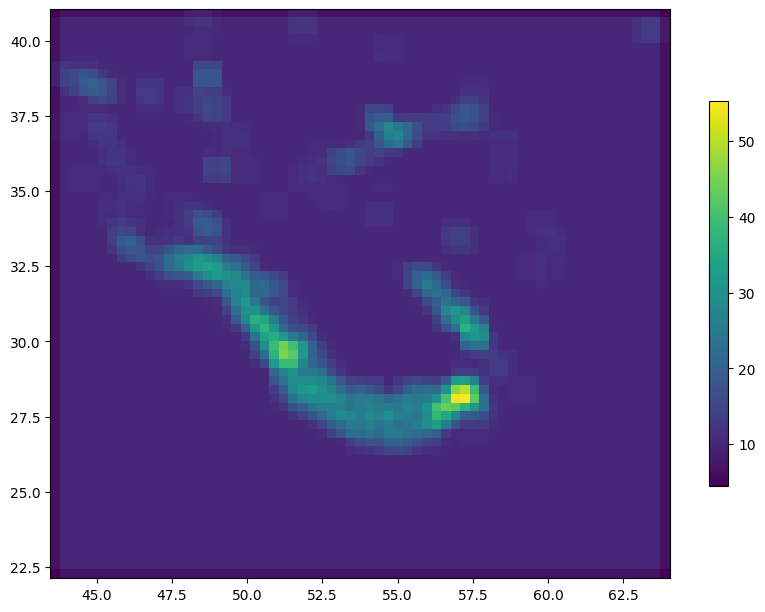

/Users/sina/Documents/Course/AD Seismology 2/DBSCAN/iran/New_Run/density.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell["Density"] = int(smooth_val)


Done!
File saved as: den_cat_65_smooth.csv


In [5]:
file_name = 'decl_cat.csv'
cell_number = 65

density = EQ_Density(file_name, cell_number)
heat_matrix = density.calc_density(save_file_name=f"den_cat_{cell_number}.csv")
density.plot_den()
smooth_heat_matrix = density.cell_smoother(apply_smooth=True)

Clustering den_cat_65.csv


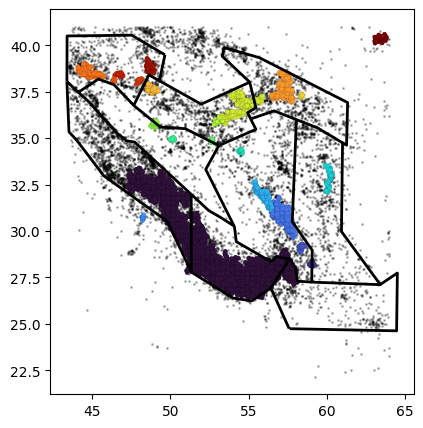

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Clustering den_cat_65_smooth.csv


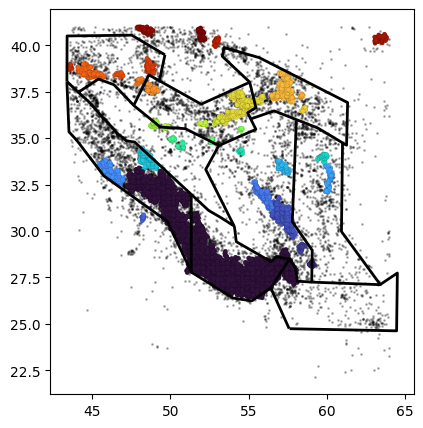

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [6]:
radius = density.radius

density_file_name = f"den_cat_{cell_number}.csv"
density_file_name = f"den_cat_{cell_number}_smooth.csv"
density_file_names = [f"den_cat_{cell_number}.csv", f"den_cat_{cell_number}_smooth.csv"]

for density_file_name in density_file_names:
    print(f"Clustering {density_file_name}")
    clustering = dbscan(radius, density_file_name)
    final = clustering.clustering()
    clustering.plot_clusters()
    final.to_csv(f"Result__{density_file_name}")
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

In [9]:
import matplotlib.pyplot as plt
import mpl_toolkits 

In [20]:
m = plt.cm.ScalarMappable(cmap='jet')
#add topo map
m = mpl_toolkits.Basemap(llcrnrlon=120, llcrnrlat=20, urcrnrlon=122, urcrnrlat=22, resolution='h')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
mappable = ax.imshow(heat_matrix, cmap='jet')
ax.set_title("Density Map")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
fig.colorbar(shrink=0.5, label="Density", mappable=mappable)
plt.show()

AttributeError: module 'mpl_toolkits' has no attribute 'Basemap'